In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("train.csv")
df.shape

(404290, 6)

In [4]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
179847,179847,275863,275864,What is the dressing style of Americans?,"What does ""dressing style"" mean?",0
259579,259579,237798,375364,What is the difference between PGDM and EPGP i...,What is the difference between PGPX and PGP pr...,0
14294,14294,27389,27390,Should Edward Snowden be considered a hero?,Is Edward Snowden a hero?,1
70994,70994,122253,118707,How is the President of USA selected?,How is the U.S. President elected?,1
239149,239149,327520,143115,Can I learn martial arts on my own?,Is self training of martial arts possible?,1
49709,49709,88446,88447,Who is your favorite superhero from the comics?,What are some of your favorite comics?,0
131585,131585,32634,6775,What are different ways to deal with social an...,How do I deal with social anxiety disorder?,1
288789,288789,409801,409802,What are the hardest adjustments to make when ...,What are the hardest adjustments to make when ...,0
267654,267654,373497,47086,What is the best way to promote your YouTube C...,What are the best ways to promote a YouTube ch...,0
356207,356207,485492,137540,For what purpose we are here in this world?,What is purpose of living and why we are here ...,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [5]:
# missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [6]:
# duplicate rows
df.duplicated().sum()

np.int64(0)

is_duplicate
0    255027
1    149263
Name: count, dtype: int64
is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

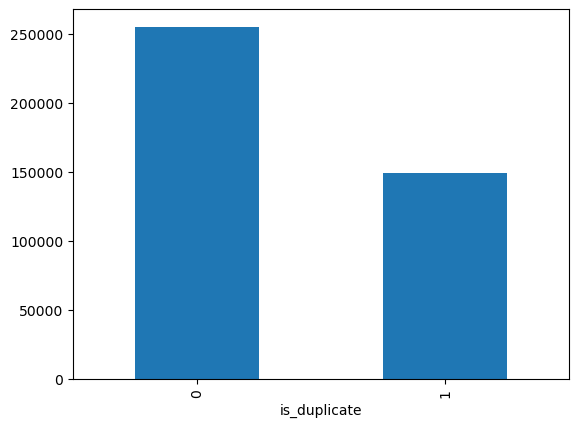

In [7]:
# Distribution of duplicate and non-duplicate questions

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [8]:
# Repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 537933
Number of questions getting repeated 111780


Sirf question kitni baar aa rha

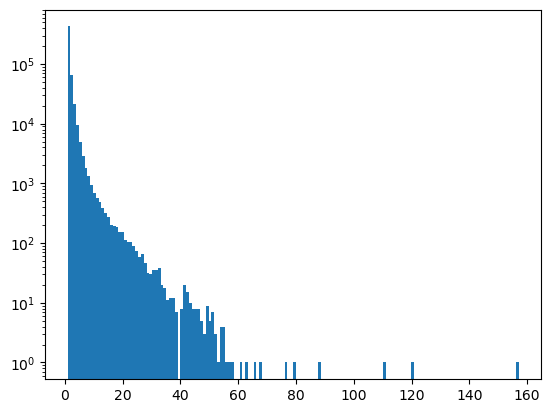

In [9]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()